# Weekly Memo

### Feb 11- Feb 17

### Image processing of porous electrode:

1 Convert grayscale image to binary image
<br>
There are several ways in binarizing the gray scale image using python. First, I tried to use opencv to produce the thresholded image:

In [6]:
!pip3 install matplotlib

Downloading/unpacking matplotlib
  Running setup.py (path:/tmp/pip_build_fwang8/matplotlib/setup.py) egg_info for package matplotlib
    
    Matplotlib 3.0+ does not support Python 2.x, 3.0, 3.1, 3.2, 3.3, or 3.4.
    Beginning with Matplotlib 3.0, Python 3.5 and above is required.
    
    This may be due to an out of date pip.
    
    Make sure you have pip >= 9.0.1.
    
    Complete output from command python setup.py egg_info:
    

Matplotlib 3.0+ does not support Python 2.x, 3.0, 3.1, 3.2, 3.3, or 3.4.

Beginning with Matplotlib 3.0, Python 3.5 and above is required.



This may be due to an out of date pip.



Make sure you have pip >= 9.0.1.



----------------------------------------
Cleaning up...
Command python setup.py egg_info failed with error code 1 in /tmp/pip_build_fwang8/matplotlib
Storing debug log for failure in /users/fwang8/.pip/pip.log


In [2]:
!pip3 install scikit-image

In [3]:
!pip3 install imageio

In [21]:
!pip3 install sympy

    100% |████████████████████████████████| 5.9MB 2.7MB/s 
    100% |████████████████████████████████| 522kB 8.1MB/s 
  Running setup.py install for mpmath ... - \ | / - \ done
  Running setup.py install for sympy ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done


In [24]:
%matplotlib inline

import sys
sys.path.append('/usr/local/lib/python3.7/site-packages')
import glob
import os
import cv2 as cv
import numpy as np
import sympy as sp
import imageio
import matplotlib.pyplot as plt
from skimage.filters import try_all_threshold
from skimage.filters import threshold_otsu
from skimage import io
from IPython.core.display import Image, display 

Read 16 bit grayscale image and crop the image:

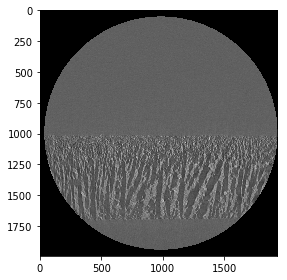

In [5]:
img=cv.imread('/Volumes/Fang_backup/porous_media/CZ XRM_Clemson_Carbon_HR_0.34um_0011.tiff',-1)
io.imshow(img)

Plot the image histogram of distribution of pixel intensities in the image:

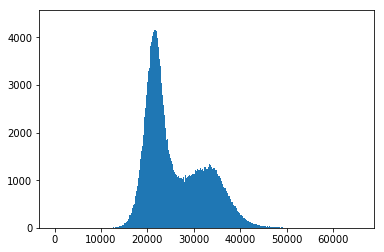

In [6]:
imcrop = img[1250:1700,360:1600]
plt.hist(imcrop.ravel(),bins=np.linspace(0, 65536, 1000))
plt.show()

A bimodal image is shown, which means that Otsu's binarization is better to apply to determine the threshold value. But currently Otsu's methd only apply to 8 bit image in opencv, so the threshold value can be determined manualy from the histrogram (around 28200), in the middle of those two peaks. So I use scikit-image to threshold the image which support 16 bit image and print the optimal threshold value:

In [7]:
thresh = threshold_otsu(imcrop)
binary = imcrop > thresh
print (thresh)

27775


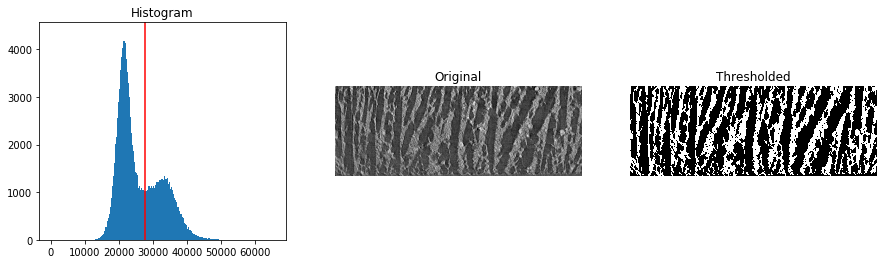

In [8]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 4))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 2)
ax[1] = plt.subplot(1, 3, 1)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[1].hist(imcrop.ravel(), bins=np.linspace(0, 65536, 1000))
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[0].imshow(imcrop, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

2 Binarizing 400 slice images to reconstruct the 3D image of porous media

In [18]:
for i in sorted(glob.glob('CZ XRM_Clemson_Carbon_HR_0.34um_*.tiff')):
   
    print (i)

    image = io.imread(fname = i)
    image = image[1250:1650,400:1600]
    thresh = threshold_otsu(image)
    binary = image > thresh

    np_img = np.array(binary, dtype=np.uint8)

    plt.imsave('binary_'+i, binary, cmap=plt.cm.gray)
    imageio.imwrite('Image_'+i, np_img)


CZ XRM_Clemson_Carbon_HR_0.34um_0011.tiff
CZ XRM_Clemson_Carbon_HR_0.34um_0012.tiff
CZ XRM_Clemson_Carbon_HR_0.34um_0013.tiff
CZ XRM_Clemson_Carbon_HR_0.34um_0014.tiff
CZ XRM_Clemson_Carbon_HR_0.34um_0015.tiff
CZ XRM_Clemson_Carbon_HR_0.34um_0016.tiff
CZ XRM_Clemson_Carbon_HR_0.34um_0017.tiff
CZ XRM_Clemson_Carbon_HR_0.34um_0018.tiff
CZ XRM_Clemson_Carbon_HR_0.34um_0019.tiff
CZ XRM_Clemson_Carbon_HR_0.34um_0020.tiff
CZ XRM_Clemson_Carbon_HR_0.34um_0021.tiff
CZ XRM_Clemson_Carbon_HR_0.34um_0022.tiff
CZ XRM_Clemson_Carbon_HR_0.34um_0023.tiff
CZ XRM_Clemson_Carbon_HR_0.34um_0024.tiff
CZ XRM_Clemson_Carbon_HR_0.34um_0025.tiff
CZ XRM_Clemson_Carbon_HR_0.34um_0026.tiff
CZ XRM_Clemson_Carbon_HR_0.34um_0027.tiff
CZ XRM_Clemson_Carbon_HR_0.34um_0028.tiff
CZ XRM_Clemson_Carbon_HR_0.34um_0029.tiff
CZ XRM_Clemson_Carbon_HR_0.34um_0030.tiff
CZ XRM_Clemson_Carbon_HR_0.34um_0031.tiff
CZ XRM_Clemson_Carbon_HR_0.34um_0032.tiff
CZ XRM_Clemson_Carbon_HR_0.34um_0033.tiff
CZ XRM_Clemson_Carbon_HR_0.34um_00

Stack all 2D image to reconstruct the 3D image and save the image in .tiff format for visualization in paraview and text file for simulation in lb3d.

In [26]:
image_collection = io.imread_collection('/Users/fangwang/notebook/Image_*.tiff')
image_3d = io.concatenate_images(image_collection)
print (image_3d.shape)
imageio.mimsave('Carbon_HR_3D.tiff', np.array(image_3d))
np.savetxt('Carbon_HR_3D.dat', image_3d.reshape((-1,400)),fmt='%i')

(400, 400, 1200)


The 3d image of porous media 'Carbon_HR_3D.tiff' can be visulized in paraview:

In [28]:
PATH = "/Users/fangwang/notebook/"
Image(filename = PATH + "porous_electrode.png")

### Summary of plotting of wetting morphology simulation

1 morphology 

In order to ensure that the boundary condition does not make a difference on the stable wetting morphology, I run the simulation by using periodic boundary condition and full resevior boundary condition (previous jobs are runing with PBC) and plot the evolution of pressure inside the drop $p_{in}$, outside the drop  $p_{out}$ and capillary pressure $\Delta p$ with respect to time. It turns out the evolution of $p_{out}$ and $\Delta p$ wiil be affected by boundary condition but $p_{in}$ is not influenced by the choice of bc, below shows the pressure inside the drop: 

In [2]:
from IPython.core.display import Image, display 

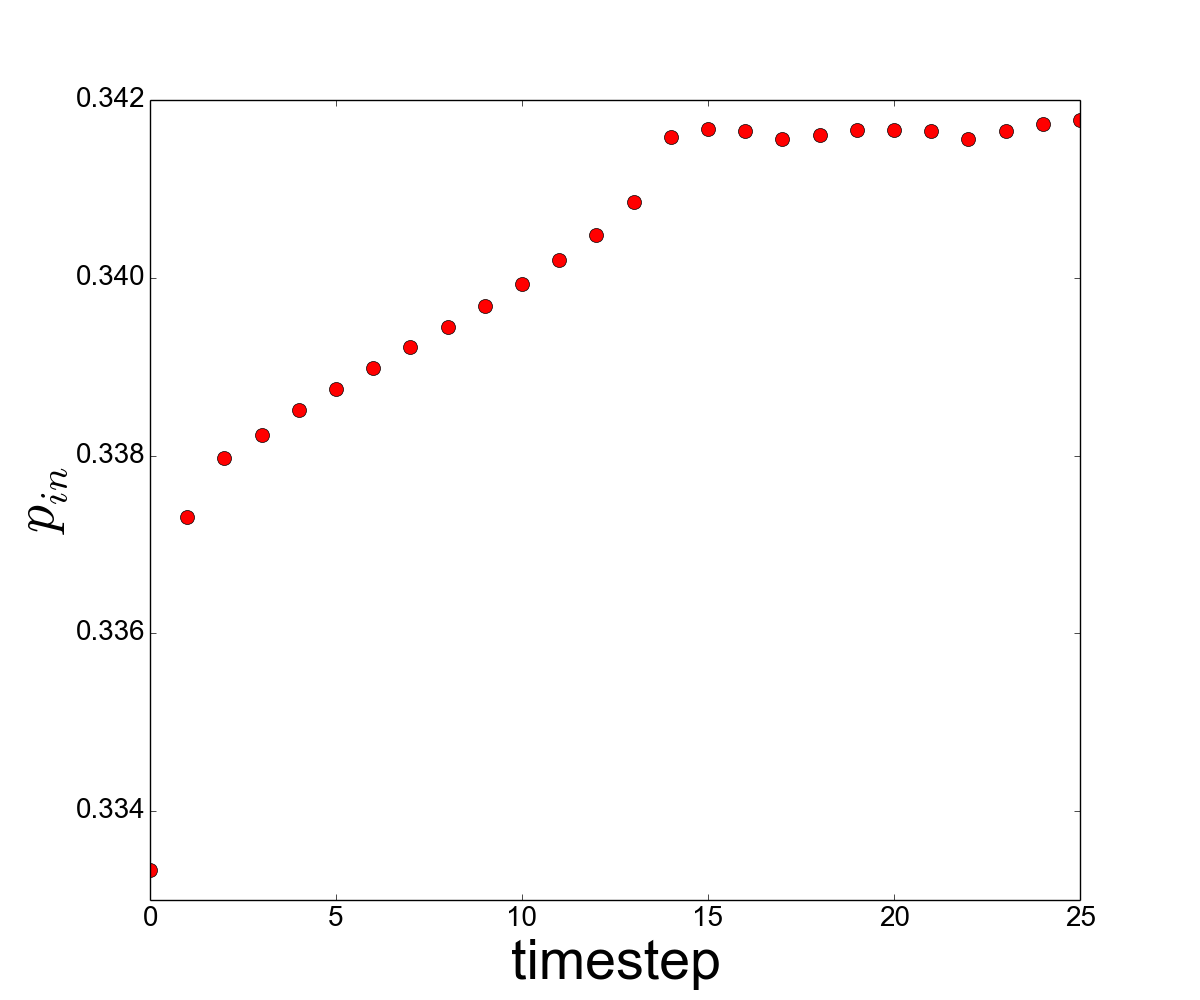

In [8]:
display(Image(filename='/Users/fangwang/notebook/pin.png'))

The following script is used to determine the pressure and wetting length of stable configuration:

In [5]:
!pip3 install h5py

In Python3, dictionary keys returns a 'view', not an indexable list. Problem can be solved by adding the list. I just switch to Python2.

In [6]:
%matplotlib inline

from __future__ import division
import h5py as h5
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nx = 150
ny = 150
nx_2 = nx/2

File = h5.File('/Users/fangwang/notebook/scp_wetting_t00500000-0251161333.h5')
group_key = File.keys()[0]
data = list(File[group_key])
data_as_array = np.array(data)
p = []
pressure = np.append(p, data_as_array)

nz = len(pressure)/( nx * nx)
nz_2 = nz/2

Define $p_{out}$, $p_{in}$, $\Delta p$ and wetting length:

In [3]:
pressure = np.reshape(pressure,(nz,nx,nx))
scpz = pressure[:,nx_2,nx_2]
scpx = pressure[nz_2,nx_2,:]

z = np.arange(0,nz,1)
pin = pressure[nz_2,nx_2,nx_2]
pout_z = pressure[1,nx_2,nx_2]
pout_x = pressure[nz_2,1,nx_2]

p_interz = (pin + pout_z) / 2
p_interx = (pin + pout_x) / 2

delta_p = pin-pout_z

minz = min(scpz)
z_minz = np.argwhere(scpz == minz)
minx = min(scpx)
x_minx = np.argwhere(scpx == minx)


length_z = np.absolute(z_minz - nz_2 )
length_x = np.absolute(x_minx - nx_2 )

/Users/fangwang/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
/Users/fangwang/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
/Users/fangwang/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/fangwang/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:7: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/fangwang/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipy

Print out the pressure and length:

In [4]:
print "pressure (0,0,0):", pressure[0,0,0]
print "pressure inside:", pin
print "delta_p", delta_p
print "pressure (1,nx/2,nx/2):", pout_z
print "pressure (nz/2,1,75):", pressure[nz_2,1,nx_2]
print "length_z",length_z*2
print "length_x",length_x*2

pressure (0,0,0): 0.337076896182
pressure inside: 0.341285490036
delta_p 0.00421303199522
pressure (1,nx/2,nx/2): 0.337072458041
pressure (nz/2,1,75): 0.336325949877
length_z [[ 132.]]
length_x [[ 76.]]


/Users/fangwang/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Plot the pressure along z axis:

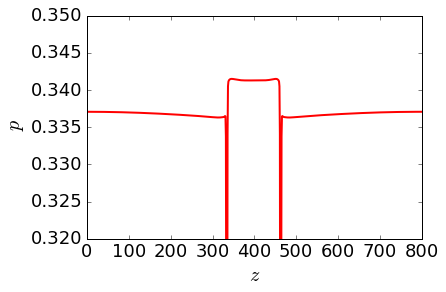

In [5]:
plt.plot(z,scpz,'r-',linewidth=2)
plt.xlabel('$z$',fontsize = 20)
plt.ylabel(' $p$',fontsize = 20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(0.32,0.35)
plt.show()

The two initial configuration of drop on parallel fibers are show below:
<br>
(1) Initial configuration of spherical drop

In [18]:
display(Image(filename='/Users/fangwang/notebook/initial_spherical.png'))

(2) Initial configuration of column 

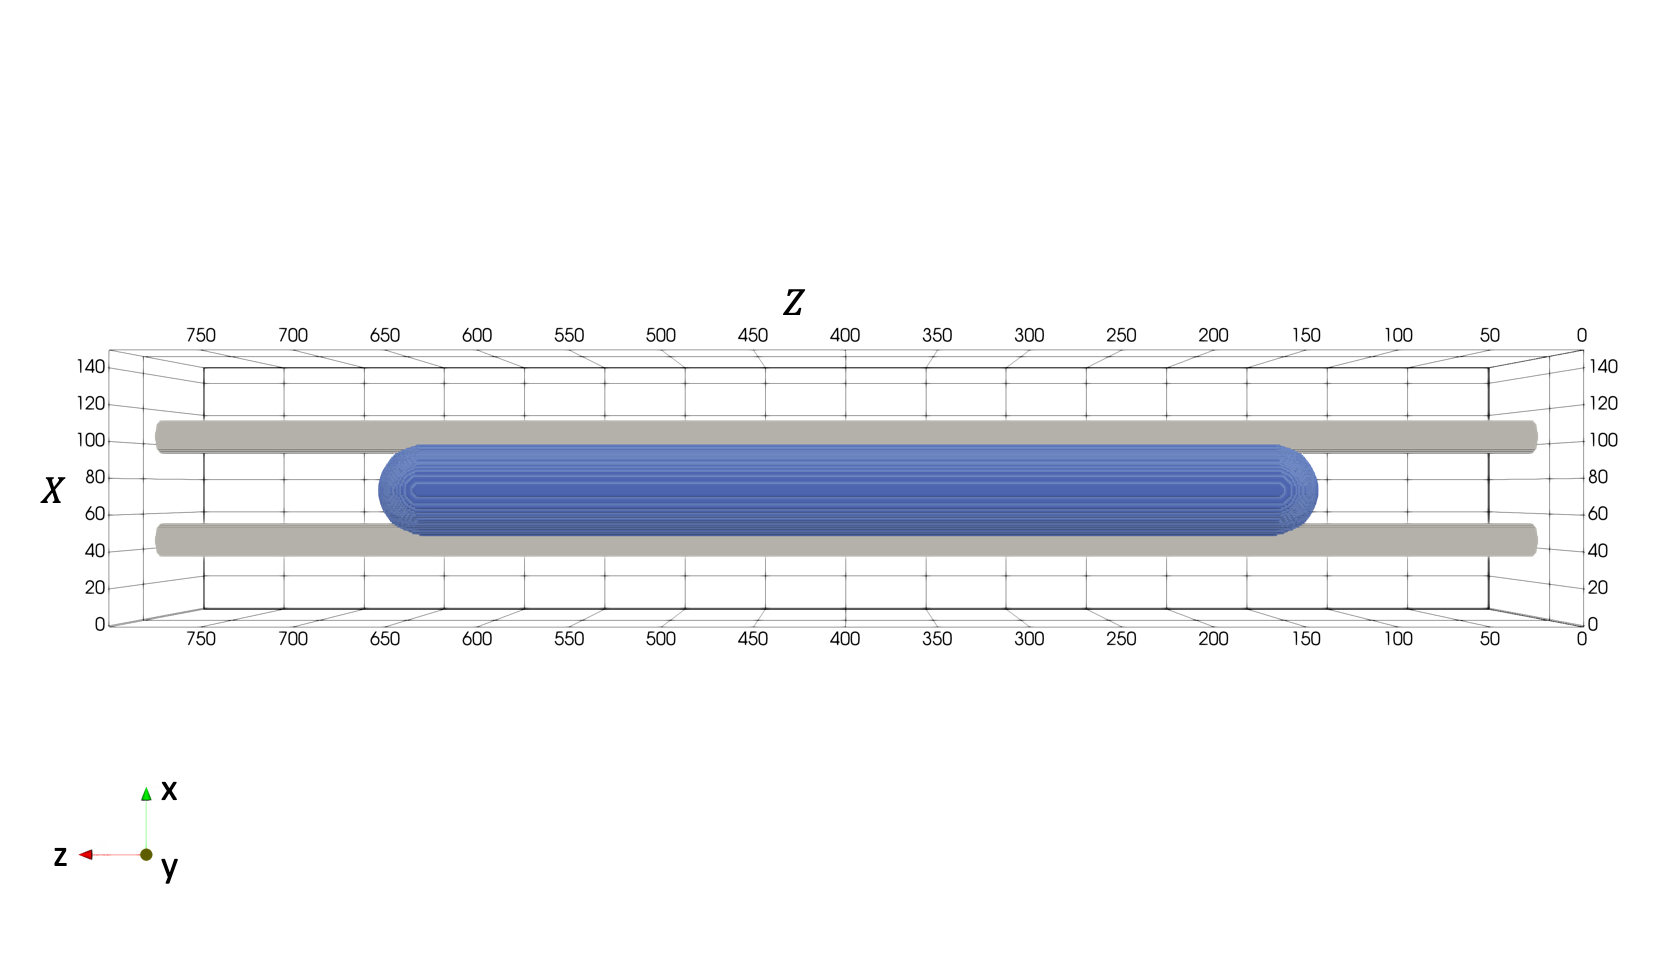

In [5]:
display(Image(filename='/Users/fangwang/notebook/initial-cd-d20-r66.png'))

In [21]:
display(Image(filename='/Users/fangwang/notebook/equa_config.png'))

2 contact angle geometrical measurement

Define contact angle measurement function:

In [7]:
nx = 150
ny = 150
nz = 150


def cal_contact_angle(density_file):

    File = h5.File(density_file)
    group_key = File.keys()[0]
    data = list(File[group_key])
    data_as_array = np.array(data)
    

    rho = []
    density = np.append(rho, data_as_array)
    density = np.reshape(density,(nz,nx,nx))

    denx = density[3.0,ny/2.0,:]
    denz = density[:,ny/2.0,nx/2.0]


    rho_in = density[4.0,ny/2.0,nx/2.0]
    rho_out = density[nx/2.0,nx/2.0,nx/2.0]
    
    rho_inter = (rho_in + rho_out) / 2.0


    minx = min(denx, key=lambda x:abs(x-rho_inter))
    minz = min(denz, key=lambda x:abs(x-rho_inter))


    x_minx = np.argwhere(denx == minx)
    z_minz = np.argwhere(denz == minz)

    b = 2*np.absolute(x_minx - nx/2 )
    h = np.absolute(z_minz - 2)
    

    r = (4 * h**2 + b**2) / (8 * h)
    arctan_theta = np.arctan( (r-h)/(b/2) )

    theta = 90 - np.degrees(arctan_theta)
    
    return theta

Calculate contact angle:

In [8]:
density_file = ('/Users/fangwang/notebook/wd_wetting_t00020000-0011104515.h5')
cal_contact_angle(density_file)

/Users/fangwang/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:18: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/fangwang/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:19: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/fangwang/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:22: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/fangwang/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:23: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


array([[ 40.19046238]])

3 Plot wetting morphology diagram 

Wetting diagram for contact angle $0^{\circ}$: load data

In [10]:
data1 = np.loadtxt('/Users/fangwang/notebook/wetting_diagram_0/d_dc')
data2 = np.loadtxt('/Users/fangwang/notebook/wetting_diagram_0/d_cd')
data3 = np.loadtxt('/Users/fangwang/notebook/wetting_diagram_0/v_d_0')
data4 = np.loadtxt('/Users/fangwang/notebook/wetting_diagram_0/v_d_horizontal_0')
data5 = np.loadtxt('/Users/fangwang/notebook/wetting_diagram_0/v_d_vertical_0')
data6 = np.loadtxt('/Users/fangwang/notebook/wetting_diagram_0/lbm_cd')
column = np.loadtxt('/Users/fangwang/notebook/wetting_diagram_0/column_0')
bridge = np.loadtxt('/Users/fangwang/notebook/wetting_diagram_0/bridge_0')
barrel = np.loadtxt('/Users/fangwang/notebook/wetting_diagram_0/barrel_0')

plot

In [11]:
#read data
v1 = data1[:,0]
d_dc = data1[:,1]
v2 = data2[:,0]
d_cd = data2[:,1]
v_lbm_cd = data6[:,0]
d_lbm_cd = data6[:,1]
v = data3[:,0]
d = data3[:,1]
v = data3[:,0]
d2 = data4[:,1]
v3 = data5[:,0]
d3 = data5[:,1]
v_column = column[:,0]
d_column = column[:,1]
v_bridge = bridge[:,0]
d_bridge = bridge[:,1]
v_barrel = barrel[:,0]
d_barrel = barrel[:,1]

x = np.arange(0.0,1400,0.01)
y = np.array([1.414 for i in xrange(len(x))])

#plot
fig, ax = plt.subplots()
fig.set_size_inches(11,10)
ax.fill_between(x,2.5,y, facecolor='gold', alpha=0.6,edgecolor="b", linewidth=0.0)
ax.fill_between(v,0,d, facecolor='cornflowerblue', alpha=1.0,edgecolor="b", linewidth=0.0)
ax.fill_between(v,d,d2, facecolor='limegreen', alpha=0.7, linewidth=0.0)
ax.fill_between(v3,1.414,d3, facecolor='pink', alpha=1.0, linewidth=0.0)

plt.plot(v1,d_dc,color='dimgrey', marker='s', linewidth=0,markeredgecolor='none',markersize=14)
plt.plot(v2,d_cd,color='dimgrey', marker='o', linewidth=0,markeredgecolor='none',markersize=14)
plt.plot(v_lbm_cd,d_lbm_cd,color='blue', marker='o', linewidth=0,markeredgecolor='none',markersize=18)
plt.plot(v_column,d_column,color='red', marker='^', linewidth=0,markeredgecolor='none',markersize=14)
plt.plot(v_bridge,d_bridge,color='red', marker='*', linewidth=0,markeredgecolor='none',markersize=16)
plt.plot(v_barrel,d_barrel,color='red', marker='D', linewidth=0,markeredgecolor='none',markersize=10)
plt.text(0.3, 0.75, 'droplet bridge', horizontalalignment='center', verticalalignment='center', fontsize = 30,transform=ax.transAxes)
plt.text(0.82, 0.75, 'barrel-drop', horizontalalignment='center', verticalalignment='center', fontsize = 30,transform=ax.transAxes)
plt.text(0.4, 0.25, 'column', horizontalalignment='center', verticalalignment='center', fontsize = 30,transform=ax.transAxes)
plt.xlabel('$\overline{V}$',fontsize = 48,fontweight='bold')
plt.ylabel('$\overline{d}$',fontsize = 48,fontweight='bold')
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.ylim(0.0, 2.5)
plt.xlim(0.0, 1400)
#fig.savefig('diagram.png')
plt.show()

Wetting diagram for contact angle $40^{\circ}$: load data

In [14]:
data1 = np.loadtxt('/Users/fangwang/notebook/wetting_diagram_50/v_d_50')
data2 = np.loadtxt('/Users/fangwang/notebook/wetting_diagram_50/v_d_horizontal_50')
data3 = np.loadtxt('/Users/fangwang/notebook/wetting_diagram_50/v_d_vertical_50')
column = np.loadtxt('/Users/fangwang/notebook/wetting_diagram_50/column_50')
bridge = np.loadtxt('/Users/fangwang/notebook/wetting_diagram_50/bridge_50')
barrel = np.loadtxt('/Users/fangwang/notebook/wetting_diagram_50/barrel_50')

plot

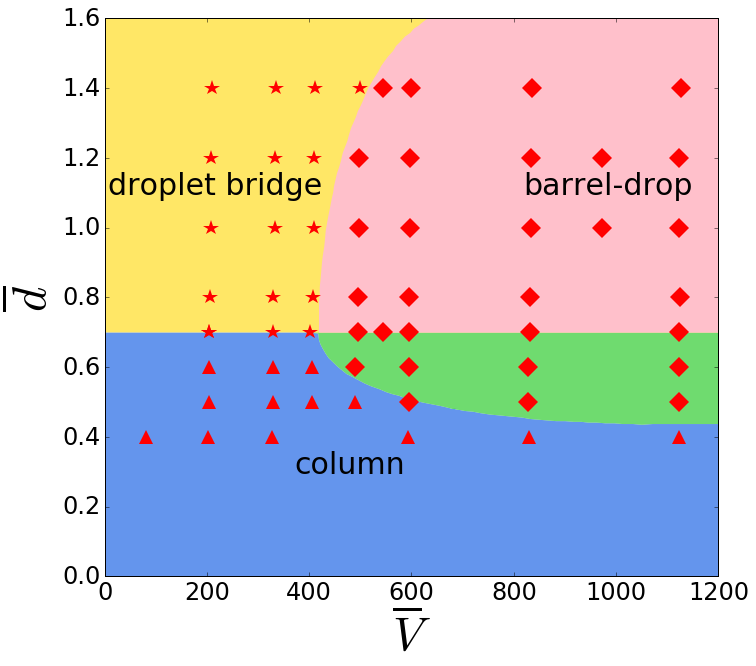

In [15]:
#read data
v = data1[:,0]
d = data1[:,1]
v = data1[:,0]
d2 = data2[:,1]
v3 = data3[:,0]
d3 = data3[:,1]
v_column = column[:,0]
d_column = column[:,1]
v_bridge = bridge[:,0]
d_bridge = bridge[:,1]
v_barrel = barrel[:,0]
d_barrel = barrel[:,1]

x = np.arange(0.0,1200,0.01)
y = np.array([0.7 for i in xrange(len(x))])


#plot
fig, ax = plt.subplots()
fig.set_size_inches(11,10)
ax.fill_between(x,2.5,y, facecolor='gold', alpha=0.6,edgecolor="b", linewidth=0.0)
ax.fill_between(v,0,d, facecolor='cornflowerblue', alpha=1.0,edgecolor="b", linewidth=0.0)
ax.fill_between(v,d,d2, facecolor='limegreen', alpha=0.7, linewidth=0.0)
ax.fill_between(v3,0.7,d3, facecolor='pink', alpha=1.0, linewidth=0.0)


plt.plot(v_column,d_column,color='red', marker='^', linewidth=0,markeredgecolor='none',markersize=14)
plt.plot(v_bridge,d_bridge,color='red', marker='*', linewidth=0,markeredgecolor='none',markersize=16)
plt.plot(v_barrel,d_barrel,color='red', marker='D', linewidth=0,markeredgecolor='none',markersize=14)
plt.text(0.18, 0.7, 'droplet bridge', horizontalalignment='center', verticalalignment='center', fontsize = 30,transform=ax.transAxes)
plt.text(0.82, 0.7, 'barrel-drop', horizontalalignment='center', verticalalignment='center', fontsize = 30,transform=ax.transAxes)
plt.text(0.4, 0.2, 'column', horizontalalignment='center', verticalalignment='center', fontsize = 30,transform=ax.transAxes)
plt.xlabel('$\overline{V}$',fontsize = 48,fontweight='bold')
plt.ylabel('$\overline{d}$',fontsize = 48,fontweight='bold')
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.ylim(0.0, 1.6)
plt.xlim(0.0, 1200)
#fig.savefig('diagram.png')
plt.show()

4 Plot pressure data for contact angle $0^{\circ}$

Plot pressure inside the droplet dependence on inter-fiber distance for spherical drop initial configuration:

In [22]:
data_45 = np.loadtxt('/Users/fangwang/notebook/wetting_data/r45_dc')
data_54 = np.loadtxt('/Users/fangwang/notebook/wetting_data/r54_dc')
data_60 = np.loadtxt('/Users/fangwang/notebook/wetting_data/r60_dc')
data_61 = np.loadtxt('/Users/fangwang/notebook/wetting_data/r61_dc')
data_63 = np.loadtxt('/Users/fangwang/notebook/wetting_data/r63_dc')
data_66 = np.loadtxt('/Users/fangwang/notebook/wetting_data/r66_dc')
data_69 = np.loadtxt('/Users/fangwang/notebook/wetting_data/r69_dc')

d_45 = data_45[:,0]
d_54 = data_54[:,0]
d_60 = data_60[:,0]
d_61 = data_61[:,0]
d_63 = data_63[:,0]
d_66 = data_66[:,0]
d_69 = data_69[:,0]

pin_45 = data_45[:,5]
pin_54 = data_54[:,5]
pin_60 = data_60[:,5]
pin_61 = data_61[:,5]
pin_63 = data_63[:,5]
pin_66 = data_66[:,5]
pin_69 = data_69[:,5]


fig = plt.figure()
fig.set_size_inches(12,10)
plt.plot(d_45,pin_45, color='cornflowerblue', marker='s',markersize=14,linewidth = 2,label = '$R=45$')
plt.plot(d_54,pin_54, color='magenta', marker='s',markersize=14,linewidth = 2,label = '$R=54$')
plt.plot(d_60,pin_60, color='red', marker='s',markersize=14,linewidth = 2,label = '$R=60$')
plt.plot(d_61,pin_61, color='cyan', marker='s',markersize=14,linewidth = 2,label = '$R=61$')
plt.plot(d_63,pin_63, color='blue', marker='s',markersize=14,linewidth = 2,label = '$R=63$')
plt.plot(d_66,pin_66, color='green', marker='s',markersize=14,linewidth = 2,label = '$R=66$')
plt.plot(d_69,pin_69, color='orange', marker='s',markersize=14,linewidth = 2,label = '$R=69$')
plt.xlabel('$\overline{d}$',fontsize = 40)
plt.ylabel('$p_{\mathrm{in}}$',fontsize = 40)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(0.7,2.3)
plt.ylim(0.3395,0.3430)
plt.legend(loc=1,numpoints=1,prop={'size':26})
#fig.savefig('dc_laplace_p_size.png')
plt.show()

Plot pressure inside the droplet dependence on drop volume for spherical drop initial configuration:

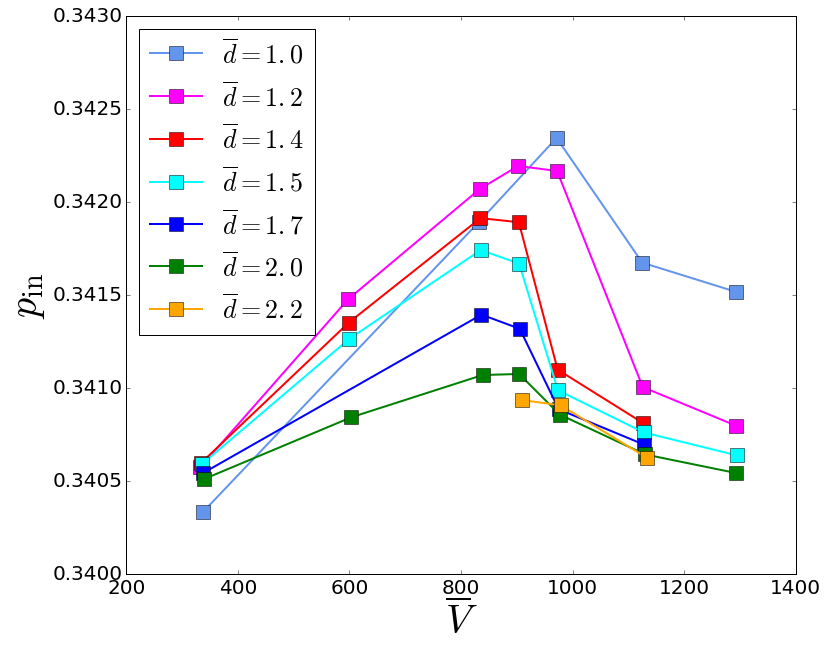

In [23]:
data_10 = np.loadtxt('/Users/fangwang/notebook/wetting_data/d10_dc')
data_12 = np.loadtxt('/Users/fangwang/notebook/wetting_data/d12_dc')
data_14 = np.loadtxt('/Users/fangwang/notebook/wetting_data/d14_dc')
data_15 = np.loadtxt('/Users/fangwang/notebook/wetting_data/d15_dc')
data_17 = np.loadtxt('/Users/fangwang/notebook/wetting_data/d17_dc')
data_20 = np.loadtxt('/Users/fangwang/notebook/wetting_data/d20_dc')
data_22 = np.loadtxt('/Users/fangwang/notebook/wetting_data/d22_dc')

#v_09 = data_09[:,2]
v_10 = data_10[:,2]
v_12 = data_12[:,2]
v_14 = data_14[:,2]
v_15 = data_15[:,2]
v_17 = data_17[:,2]
v_20 = data_20[:,2]
v_22 = data_22[:,2]


#pin_09 = data_09[:,5]
pin_10 = data_10[:,5]
pin_12 = data_12[:,5]
pin_14 = data_14[:,5]
pin_15 = data_15[:,5]
pin_17 = data_17[:,5]
pin_20 = data_20[:,5]
pin_22 = data_22[:,5]


fig = plt.figure()
fig.set_size_inches(12,10)
#plt.plot(v_09,pin_09, color='black', marker='s',markersize=12,label = '$\overline{d}=0.9$')
plt.plot(v_10,pin_10, color='cornflowerblue', marker='s',markersize=14,linewidth = 2,label = '$\overline{d}=1.0$')
plt.plot(v_12,pin_12, color='magenta', marker='s',markersize=14,linewidth = 2,label = '$\overline{d}=1.2$')
plt.plot(v_14,pin_14, color='red', marker='s',markersize=14,linewidth = 2,label = '$\overline{d}=1.4$')
plt.plot(v_15,pin_15, color='cyan', marker='s',markersize=14,linewidth = 2,label = '$\overline{d}=1.5$')
plt.plot(v_17,pin_17, color='blue', marker='s',markersize=14,linewidth = 2,label = '$\overline{d}=1.7$')
plt.plot(v_20,pin_20, color='green', marker='s',markersize=14,linewidth = 2,label = '$\overline{d}=2.0$')
plt.plot(v_22,pin_22, color='orange', marker='s',markersize=14,linewidth = 2,label = '$\overline{d}=2.2$')
plt.xlabel('$\overline{V}$',fontsize = 40)
plt.ylabel('$p_{\mathrm{in}}$',fontsize = 40)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0.3400,0.3430)
plt.legend(loc=2,numpoints=1,prop={'size':26})
#fig.savefig('dc_laplace_p_dis.png')
plt.show()

Plot pressure inside the droplet dependence on inter-fiber distance for column initial configuration:

In [24]:
data_45 = np.loadtxt('/Users/fangwang/notebook/wetting_data/r45_cd')
data_60 = np.loadtxt('/Users/fangwang/notebook/wetting_data/r60_cd')
data_63 = np.loadtxt('/Users/fangwang/notebook/wetting_data/r63_cd')
data_66 = np.loadtxt('/Users/fangwang/notebook/wetting_data/r66_cd')

d_45 = data_45[:,0]
d_60 = data_60[:,0]
d_63 = data_63[:,0]
d_66 = data_66[:,0]

pin_45 = data_45[:,5]
pin_60 = data_60[:,5]
pin_63 = data_63[:,5]
pin_66 = data_66[:,5]


fig = plt.figure()
fig.set_size_inches(12,10)
plt.plot(d_45,pin_45, color='cornflowerblue', marker='s',markersize=14,linewidth = 2,label = '$R=45$')
plt.plot(d_60,pin_60, color='red', marker='s',markersize=14,linewidth = 2,label = '$R=60$')
plt.plot(d_63,pin_63, color='blue', marker='s',markersize=14,linewidth = 2,label = '$R=63$')
plt.plot(d_66,pin_66, color='green', marker='s',markersize=14,linewidth = 2,label = '$R=66$')
plt.xlabel('$\overline{d}$',fontsize = 40)
plt.ylabel('$p_{\mathrm{in}}$',fontsize = 40)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(0.7,2.3)
plt.ylim(0.3395,0.3430)
plt.legend(loc=1,numpoints=1,prop={'size':26})
#fig.savefig('cd_laplace_p_size.png')
plt.show()


Plot pressure inside the droplet dependence on drop volume for column initial configuration:

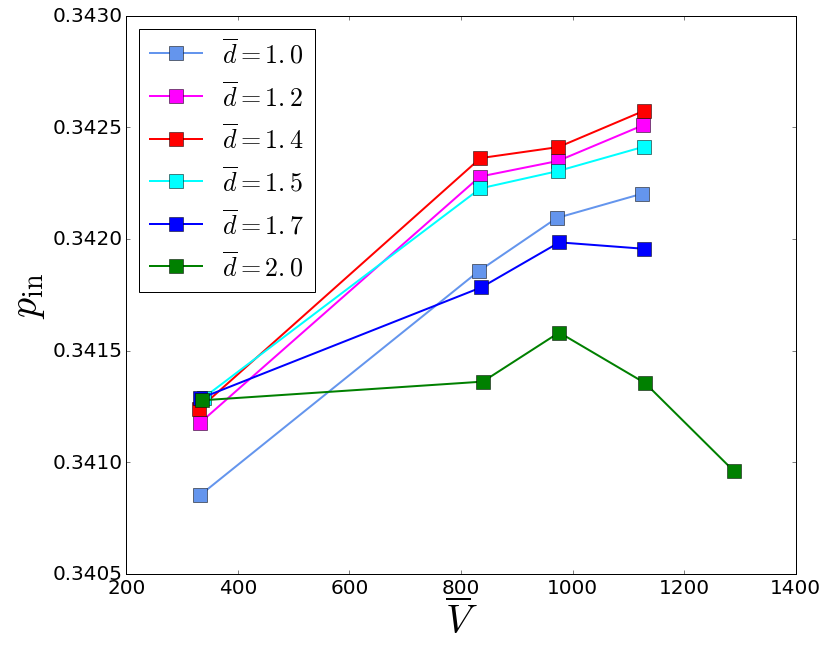

In [25]:
data_10 = np.loadtxt('/Users/fangwang/notebook/wetting_data/d10_cd')
data_12 = np.loadtxt('/Users/fangwang/notebook/wetting_data/d12_cd')
data_14 = np.loadtxt('/Users/fangwang/notebook/wetting_data/d14_cd')
data_15 = np.loadtxt('/Users/fangwang/notebook/wetting_data/d15_cd')
data_17 = np.loadtxt('/Users/fangwang/notebook/wetting_data/d17_cd')
data_20 = np.loadtxt('/Users/fangwang/notebook/wetting_data/d20_cd')
#data_22 = np.loadtxt('d22_dc')

#v_09 = data_09[:,2]
v_10 = data_10[:,2]
v_12 = data_12[:,2]
v_14 = data_14[:,2]
v_15 = data_15[:,2]
v_17 = data_17[:,2]
v_20 = data_20[:,2]
#v_22 = data_22[:,2]


#pin_09 = data_09[:,5]
pin_10 = data_10[:,5]
pin_12 = data_12[:,5]
pin_14 = data_14[:,5]
pin_15 = data_15[:,5]
pin_17 = data_17[:,5]
pin_20 = data_20[:,5]
#pin_22 = data_22[:,5]


fig = plt.figure()
fig.set_size_inches(12,10)
#plt.plot(v_09,pin_09, color='black', marker='s',markersize=12,label = '$\overline{d}=0.9$')
plt.plot(v_10,pin_10, color='cornflowerblue', marker='s',markersize=14,linewidth = 2,label = '$\overline{d}=1.0$')
plt.plot(v_12,pin_12, color='magenta', marker='s',markersize=14,linewidth = 2,label = '$\overline{d}=1.2$')
plt.plot(v_14,pin_14, color='red', marker='s',markersize=14,linewidth = 2,label = '$\overline{d}=1.4$')
plt.plot(v_15,pin_15, color='cyan', marker='s',markersize=14,linewidth = 2,label = '$\overline{d}=1.5$')
plt.plot(v_17,pin_17, color='blue', marker='s',markersize=14,linewidth = 2,label = '$\overline{d}=1.7$')
plt.plot(v_20,pin_20, color='green', marker='s',markersize=14,linewidth = 2,label = '$\overline{d}=2.0$')
#plt.plot(v_22,pin_22, color='orange', marker='s',markersize=14,linewidth = 2,label = '$\overline{d}=2.2$')
plt.xlabel('$\overline{V}$',fontsize = 40)
plt.ylabel('$p_{\mathrm{in}}$',fontsize = 40)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0.3405,0.3430)
plt.legend(loc=2,numpoints=1,prop={'size':26})
#fig.savefig('cd_laplace_p_dis.png')
plt.show()

5 Plot pressure data for contact angle $40^{\circ}$

Plot pressure inside the droplet dependence on inter-fiber distance for spherical drop initial configuration:

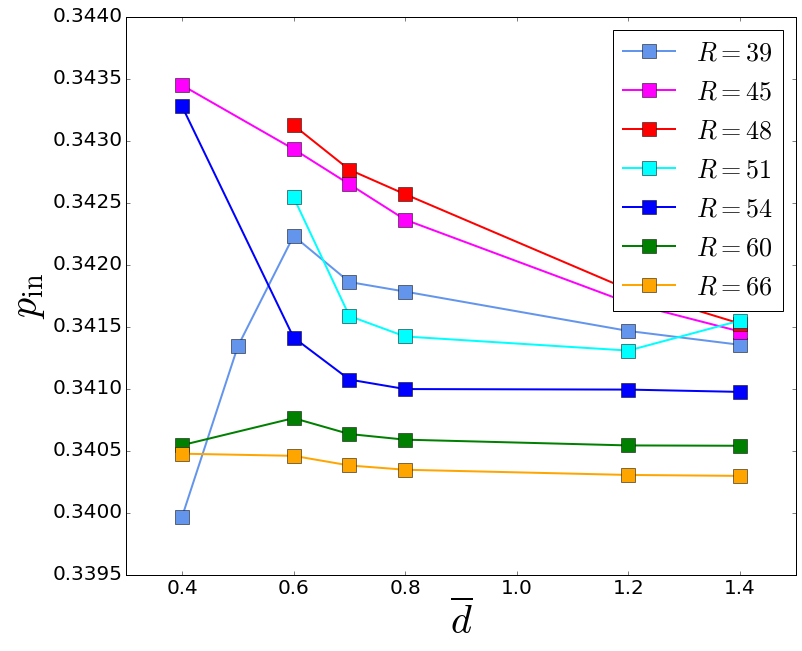

In [26]:
data_39 = np.loadtxt('/Users/fangwang/notebook/wetting_data/r39_dc50')
data_45 = np.loadtxt('/Users/fangwang/notebook/wetting_data/r45_dc50')
data_48 = np.loadtxt('/Users/fangwang/notebook/wetting_data/r48_dc50')
data_51 = np.loadtxt('/Users/fangwang/notebook/wetting_data/r51_dc50')
data_54 = np.loadtxt('/Users/fangwang/notebook/wetting_data/r54_dc50')
data_60 = np.loadtxt('/Users/fangwang/notebook/wetting_data/r60_dc50')
data_66 = np.loadtxt('/Users/fangwang/notebook/wetting_data/r66_dc50')

d_39 = data_39[:,0]
d_45 = data_45[:,0]
d_48 = data_48[:,0]
d_51 = data_51[:,0]
d_54 = data_54[:,0]
d_60 = data_60[:,0]
d_66 = data_66[:,0]

pin_39 = data_39[:,5]
pin_45 = data_45[:,5]
pin_48 = data_48[:,5]
pin_51 = data_51[:,5]
pin_54 = data_54[:,5]
pin_60 = data_60[:,5]
pin_66 = data_66[:,5]



fig = plt.figure()
fig.set_size_inches(12,10)
plt.plot(d_39,pin_39, color='cornflowerblue', marker='s',markersize=14,linewidth = 2,label = '$R=39$')
plt.plot(d_45,pin_45, color='magenta', marker='s',markersize=14,linewidth = 2,label = '$R=45$')
plt.plot(d_48,pin_48, color='red', marker='s',markersize=14,linewidth = 2,label = '$R=48$')
plt.plot(d_51,pin_51, color='cyan', marker='s',markersize=14,linewidth = 2,label = '$R=51$')
plt.plot(d_54,pin_54, color='blue', marker='s',markersize=14,linewidth = 2,label = '$R=54$')
plt.plot(d_60,pin_60, color='green', marker='s',markersize=14,linewidth = 2,label = '$R=60$')
plt.plot(d_66,pin_66, color='orange', marker='s',markersize=14,linewidth = 2,label = '$R=66$')
plt.xlabel('$\overline{d}$',fontsize = 40)
plt.ylabel('$p_{\mathrm{in}}$',fontsize = 40)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(0.3,1.5)
plt.ylim(0.3395,0.3440)
plt.legend(loc=1,numpoints=1,prop={'size':26})
#fig.savefig('dc50_laplace_p_size.png')
plt.show()

Plot pressure inside the droplet dependence on drop volume for spherical drop initial configuration:

In [29]:
data_06 = np.loadtxt('/Users/fangwang/notebook/wetting_data/d06_dc50')
data_07 = np.loadtxt('/Users/fangwang/notebook/wetting_data/d07_dc50')
data_08 = np.loadtxt('/Users/fangwang/notebook/wetting_data/d08_dc50')
data_12 = np.loadtxt('/Users/fangwang/notebook/wetting_data/d12_dc50')
data_14 = np.loadtxt('/Users/fangwang/notebook/wetting_data/d14_dc50')

v_06 = data_06[:,2]
v_07 = data_07[:,2]
v_08 = data_08[:,2]
v_12 = data_12[:,2]
v_14 = data_14[:,2]

pin_06 = data_06[:,5]
pin_07 = data_07[:,5]
pin_08 = data_08[:,5]
pin_12 = data_12[:,5]
pin_14 = data_14[:,5]



fig = plt.figure()
fig.set_size_inches(12,10)
plt.plot(v_06,pin_06, color='magenta', marker='s',markersize=14,linewidth = 2,label = '$\overline{d}=0.6$')
plt.plot(v_07,pin_07, color='red', marker='s',markersize=14,linewidth = 2,label = '$\overline{d}=0.7$')
plt.plot(v_08,pin_08, color='cyan', marker='s',markersize=14,linewidth = 2,label = '$\overline{d}=0.8$')
plt.plot(v_12,pin_12, color='blue', marker='s',markersize=14,linewidth = 2,label = '$\overline{d}=1.2$')
plt.plot(v_14,pin_14, color='green', marker='s',markersize=14,linewidth = 2,label = '$\overline{d}=1.4$')
plt.xlabel('$\overline{V}$',fontsize = 40)
plt.ylabel('$p_{\mathrm{in}}$',fontsize = 40)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(180,1200)
#plt.ylim(0.3400,0.3430)
plt.legend(loc=1,numpoints=1,prop={'size':26})
#fig.savefig('dc50_laplace_p_dis.png')
plt.show()

### Literatures

[1] Deville, Sylvain. "Freeze‐casting of porous ceramics: a review of current achievements and issues." Advanced Engineering Materials 10.3 (2008): 155-169.
<br>
https://onlinelibrary.wiley.com/doi/abs/10.1002/adem.200700270

[2]Gouillart, Emmanuelle, Juan Nunez-Iglesias, and Stéfan Van Der Walt. "Analyzing microtomography data with Python and the scikit-image library." Advanced structural and chemical imaging 2.1 (2017): 18.
<br>
https://ascimaging.springeropen.com/articles/10.1186/s40679-016-0031-0

[3]Chung, Sang-Yeop, et al. "Pore characteristics and their Effects on the material properties of foamed concrete evaluated using micro-CT images and numerical approaches." Applied Sciences 7.6 (2017): 550.
<br>
https://www.mdpi.com/2076-3417/7/6/550

[4]Zhang, Pengfei, et al. "Multi-component segmentation of X-ray computed tomography (CT) image using multi-Otsu thresholding algorithm and scanning electron microscopy." Energy Exploration & Exploitation 35.3 (2017): 281-294.
<br>
https://journals.sagepub.com/doi/abs/10.1177/0144598717690090